# Regression Models

Regression aims to estimate the world state $w$ for a given observations $\mathbf{x}$ by modeling $P(w|\mathbf{x})$ based on obtained data $\{\mathbf{x}_{i}, w_{i}\}_{i=1}^N$.

## Linear Regression - Maximum Likelihood - 
Suppose $\mathbf{x}_{i} = (1, \tilde{\mathbf{x}}_{i}^{T})^{T}$, $\mathbf{X} = (\mathbf{x}_{1}, \cdots, \mathbf{x}_{N})$, $\mathbf{w} = (w_{1}, \cdots, w_{N})^{T}$,  $\Theta = (\phi_{0}, \phi_{1}, \sigma)$ and $\mathbf{\phi} = (\phi_{0}, \phi_{1})^{T}$

The likelihood reads as follows.
$$\begin{align}
p(\mathbf{w}|\mathbf{X}, \Theta) \quad & = &\quad Norm_{\mathbf{w}}(\mathbf{X}^{T}\phi, \sigma)\\
 \quad & = &\quad \prod_{i=1}^{N}  Norm_{w_{i}}(\mathbf{x}_{i}^{T}\phi, \sigma)
\end{align}$$

Here we perform the maximum likelihood estimations for $\Theta$.

$$\begin{align}
\Theta  \quad & = &\quad argmax_{\theta}\quad p(\mathbf{w}|\mathbf{X}, \theta)\\
\quad & = &\quad argmax_{\Theta}\quad \sum_{i=1}^{N} log \Big[ Norm_{w_{i}}(\mathbf{x}_{i}^{T}\phi, \sigma)\Big]\\
\quad & = &\quad argmax_{\theta, \sigma}\quad \sum_{i=1}^{N} \bigg[-\frac{Nlog(\sigma^{2})}{2} - \frac{(w_{i} - \mathbf{x}_{i}^{T}\phi)^{T}(w_{i} - \mathbf{x}_{i}^{T}\phi)}{2\sigma^{2}} + const\bigg]
\end{align}$$

By taking derivatives with respect to the hyperparameters and equate the results to zero, we find the values that maximize (let's assume so) the likelihood.

$$\begin{align}
\phi \quad & = &\quad (\mathbf{X}\mathbf{X}^{T})^{-1}\mathbf{X}\mathbf{w}\\
\sigma^{2} \quad & = &\quad \frac{(\mathbf{w} - \mathbf{X}^{T}\phi)^{T}(\mathbf{w} - \mathbf{X}^{T}\phi)}{N}
\end{align}$$
<br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
%matplotlib inline

# usual gangs

In [ ]:
# this function outputs an covariance matrices avoiding generating too much squashed ellipses
def generate_nice_params():
    sg = 2 * np.random.rand() + 0.5
    phi1 = 3 * (np.random.rand() - .5)
    phi0 = 2 * (np.random.rand() - .5)
    phi = np.vstack((phi0, phi1))
    return sg, phi

def generate_samples(x_range, sg, phi, ns):
    x = np.random.rand(ns)
    x *= (x_range[1] - x_range[0])
    x += x_range[0]
    x = np.vstack((np.ones(ns), x))
    w  = np.dot(phi.T, x)
    w += np.random.randn(ns) * sg
    smp = np.vstack((x, w))
    return x, w, smp

def plot_samples(x, w, phi, clr=(0.8, 0.4, 0.0), lwd=2):
    '''plot the hypothetical data set'''
    line_x = np.array([[1., 1.], [-10, 10]])
    plt.plot(x[1], w.squeeze(), 'b.', markersize=5.)
    plt.plot(line_x[1], np.dot(phi.T, line_x).squeeze(), ls='-', lw = lwd, color=clr)
    
def plot_lg_pdf(phi, sg):
    n = 201
    nn = n**2
    res = np.linspace(-20, 20, n)
    x, y = np.meshgrid(res, res)
    x_flat = x.reshape(1, nn)
    y_flat = y.reshape(1, nn)
    x1_flat = np.vstack((np.ones(nn), x_flat.squeeze()))
    mu_flat = np.dot(phi.T, x1_flat)
    lg_pdf = spst.norm(mu_flat, sg).pdf(y_flat).reshape((n, n))
    lg_pdf = np.flipud(lg_pdf)
    plt.imshow(lg_pdf, extent=[-20, 20, -20, 20])

def maximum_likelihood_inference(x, w):
    phi = np.dot(np.linalg.inv(np.dot(x, x.T)), np.dot(x, w.T))
    delta = w - np.dot(phi.T, x)
    sg2 = (delta ** 2).mean()
    sg = np.sqrt(sg2)
    return phi, sg

def evaluate_average_log_likelihood(x, w, phi, sg):
    likelhd = spst.norm(np.dot(phi.T, x), sg).pdf(w)
    log_likelhd = np.log(likelhd)
    ave_log_likehd = log_likelhd.mean()
    return ave_log_likehd

In [ ]:
ns = 50
x_range = np.array([-10., 10.])
sg, phi = generate_nice_params()
plt.rcParams['figure.figsize'] = (8.0, 9.0)

x, w, smp = generate_samples(x_range, sg, phi, ns)
ax = plt.subplot(2,2,1)
plot_samples(x, w, phi)
ave_log_likehd_true = evaluate_average_log_likelihood(x, w, phi, sg)
plt.title("Ave Log LKLHD = {:1.4f}".format(ave_log_likehd_true))
plt.xlim(x_range)
ybound = ax.get_ybound()

phie, sge = maximum_likelihood_inference(x, w)
plt.subplot(2,2,2)
plot_samples(x, w, phie)
ave_log_likehd_infr = evaluate_average_log_likelihood(x, w, phie, sge)
plt.title("Ave Log LKLHD = {:1.4f}".format(ave_log_likehd_infr))
plt.xlim(x_range)
plt.ylim(*ybound)

plt.subplot(2,2,3)
plot_lg_pdf(phi, sg)
plt.xlim(x_range)
plt.ylim(*ybound)
plt.title("grnd_truth")

plt.subplot(2,2,4)
plot_lg_pdf(phie, sge)
plt.xlim(x_range)
plt.ylim(*ybound)
plt.title("inference")

print("true: sg = {0:1.4f}, phi = [{1:1.4f}, {2:1.4f}]".format(sg, phi[0][0], phi[1][0]))
print("infr: sg = {0:1.4f}, phi = [{1:1.4f}, {2:1.4f}]".format(sge, phie[0][0], phie[1][0]))

## Bayesian linear regression


The likelihood reads as follows.
$$\begin{align}
p(\Theta|\mathbf{X}, \mathbf{w}) \quad & = &\quad \frac{p(\mathbf{w}|\mathbf{X}, \Theta)p(\Theta)}{p(\mathbf{w}|\mathbf{X})}
\end{align}$$
Suppose we know $\sigma$,
$$\begin{align}
p(\phi|\mathbf{X}, \mathbf{w}, \sigma) \quad & = &\quad \frac{p(\mathbf{w}|\mathbf{X}, \phi, \sigma)p(\phi)}{p(\mathbf{w}|\mathbf{X})}
\end{align}$$
Here we perform the maximum likelihood estimations for $\Theta$.
Suppose $\mathbf{x}_{i} = (1, \tilde{\mathbf{x}}_{i}^{T})^{T}$, $\mathbf{X} = (\mathbf{x}_{1}, \cdots, \mathbf{x}_{N})$, $\mathbf{w} = (w_{1}, \cdots, w_{N})^{T}$,  $\Theta = (\phi_{0}, \phi_{1}, \sigma)$ and $\mathbf{\phi} = (\phi_{0}, \phi_{1})^{T}$


$$\begin{align}
\mathbf{X} \quad & : &\quad (D \times N)\\
\mathbf{w} \quad & : &\quad (N \times 1)\\
\mathbf{\phi} \quad & : &\quad (D \times 1)\\
\end{align}$$

$$\begin{align}
p(\phi) \quad & = &\quad Norm_{\phi}(\mathbf{0}, \sigma_{p}^{2}\mathbf{I}_{D \times D}) \quad & = &\quad \#'
exp \bigg(-\frac{\mathbf{\phi}^{T} \mathbf{\phi}}{2\sigma_{p}^{2}}\bigg)\\
p(\mathbf{w}|\mathbf{X}, \Theta) \quad & = &\quad Norm_{\mathbf{w}}(\mathbf{X}^{T}\phi, \sigma\mathbf{I}_{N \times N}) \quad & = &\quad  \#
exp \bigg(-\frac{(\mathbf{w} - \mathbf{X}^{T}\phi)^{T}(\mathbf{w} - \mathbf{X}^{T}\phi)}{2\sigma^{2}} \bigg)
\end{align}$$

$$\begin{align}
p(\mathbf{w}|\mathbf{X}, \phi, \sigma)p(\phi) \quad & = &\quad Norm_{\mathbf{w}}(\mathbf{0}, \sigma^{2} + \sigma_{p}^{2}\mathbf{X}^{T}\mathbf{X}) Norm_{\mathbf{\phi}}\bigg(\frac{1}{\sigma^{2}}C^{-1}\mathbf{X}\mathbf{w}, C^{-1}\bigg)\\
p(\mathbf{w}|\mathbf{X}) \quad & = &\quad Norm_{\mathbf{w}}(\mathbf{0}, \sigma^{2} + \sigma_{p}^{2}\mathbf{X}^{T}\mathbf{X})\\
p(\phi|\mathbf{X}, \mathbf{w}, \sigma) \quad & = &\quad Norm_{\mathbf{\phi}}\bigg(\frac{1}{\sigma^{2}}C^{-1}\mathbf{X}\mathbf{w}, C^{-1}\bigg)
\end{align}$$
, where $C$ is
$$\begin{align}
C \quad & \equiv & \quad \frac{1}{\sigma_{p}^{2}}\mathbf{I} + \frac{1}{\sigma^{2}}\mathbf{X}\mathbf{X}^{T}\\
C^{-1} \quad & = &\quad \sigma_{p}^{2}\mathbf{I}_{D \times D} -  \sigma_{p}^{2} \mathbf{X}\bigg(\mathbf{X}^{T}\mathbf{X} +\frac{\sigma^{2}}{\sigma_{p}^{2}}\mathbf{I}_{N \times N}\bigg)^{-1}\mathbf{X}^{T}
\end{align}$$
The derivation should remind us of the relations from the section on the factor analysis.

Now, we consider the generative model for a new observation $\mathbf{x}^{*}$ and we would like to compute posterior for $w^{*}$.
$$\begin{align}
p(w^{*}|\mathbf{x}^{*}, \mathbf{X}, \mathbf{w}, \sigma) \quad & = &\quad \int d\mathbf{\phi} p(w^{*}|\mathbf{x}^{*}, \phi, \sigma)p(\phi|\mathbf{X}, \mathbf{w}, \sigma)\\
\quad & = &\quad \int d\mathbf{\phi} Norm_{\mathbf{w}}(\mathbf{\phi}^{T}\mathbf{x}^{*}, \sigma^{2}) Norm_{\mathbf{\phi}}\bigg(\frac{1}{\sigma^{2}}C^{-1}\mathbf{X}\mathbf{w}, C^{-1}\bigg)\\
\quad & = &\quad Norm_{w^{*}}\bigg(\frac{1}{\sigma^{2}}\mathbf{x}^{*T}C^{-1}\mathbf{X}\mathbf{w}, \quad \mathbf{x}^{*T}C^{-1}\mathbf{x}^{*} + \sigma^{2}\bigg)\\
\end{align}$$
<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spsp
import scipy.stats as spst
%matplotlib inline

# usual gangs

In [2]:
# this function outputs an covariance matrices avoiding generating too much squashed ellipses
def generate_nice_params():
    # sg = 1 x 1
    # sgp = 1 x 1
    # phi = D x 1
    sg = 2 * np.random.rand() + 0.5
    sgp = 2 * np.random.rand() + 0.5
    phi1 = 3 * (np.random.rand() - .5)
    phi0 = 2 * (np.random.rand() - .5)
    phi = np.vstack((phi0, phi1))
    return sg, phi, sgp

def generate_samples(x_range, sg, phi, ns):
    # w = 1 x N
    # x = D x N
    # phi = D x 1
    # mid = N x N
    # cinv = D x D
    x = np.random.rand(ns)
    x *= (x_range[1] - x_range[0])
    x += x_range[0]
    x = np.vstack((np.ones(ns), x))
    w  = np.dot(phi.T, x)
    w += np.random.randn(ns) * sg
    w = w.T
    return x, w

def plot_samples(x, w, phi, clr=(0.8, 0.4, 0.0), lwd=2):
    line_x = np.array([[1., 1.], [-10, 10]])
    plt.plot(x[1], w.squeeze(), 'b.', markersize=5.)
    plt.plot(line_x[1], np.dot(phi.T, line_x).squeeze(), ls='-', lw = lwd, color=clr) 

def plot_rg_pdf(phi, sg, n):
    nn = n**2
    res = np.linspace(-20, 20, n)
    x, y = np.meshgrid(res, res)
    x_flat = x.reshape(1, nn)
    y_flat = y.reshape(1, nn)
    x1_flat = np.vstack((np.ones(nn), x_flat.squeeze()))
    mu_flat = np.dot(phi.T, x1_flat)
    rg_pdf = spst.norm(mu_flat, sg).pdf(y_flat).reshape((n, n))
    rg_pdf = np.flipud(rg_pdf)
    plt.imshow(rg_pdf, extent=[-15, 15, -15, 15])
    
def Cinv(x, w, sg, sgp):
    # w = N x 1
    # x = D x N
    # mid = N x N
    # cinv = D x D
    D = x.shape[0]
    N = x.shape[1]
    sgs = sg**2
    sgps = sgp**2
    mid = np.dot(x.T, x)
    mid += (sgs / sgps) * np.eye(N)
    midinv = np.linalg.inv(mid)
    cinv = np.eye(D)
    cinv -= np.dot(np.dot(x, midinv), x.T)
    cinv *= sgps
    return cinv

def bayesian_inference(xs1, x, w, sg, sgp):
    # w = N x 1
    # x = D x N
    # xs1 = D x N
    # phi = D x 1
    # cinv = D x D
    # mu = N x 1
    # cov = N x N
    D = xs1.shape[0]
    N = xs1.shape[1]
    sgs = sg**2
    cinv = Cinv(x, w, sg, sgp)
    phi = np.dot(np.dot(cinv, x), w) / sgs
    mu = np.dot(xs1.T, phi).squeeze()
    # doing double np.dot then taking np.diag would be costly. instead we do this.
    cov = (np.dot(cinv.T, xs1) * xs1).sum(axis=0)
    cov += sgs
    return mu, cov, phi, cinv

def generate_phi_pdf(phimu, phisg, nres, bb):
    res = np.linspace(-bb, bb, nres)
    p0g, p1g = np.meshgrid(res, res)
    p0s = p0g.reshape(1, nres ** 2)
    p1s = p1g.reshape(1, nres ** 2)
    ps = np.vstack((p0s, p1s))
    phi_pdf = spst.multivariate_normal(phimu, phisg).pdf(ps.T).reshape((nres, nres))
    return phi_pdf



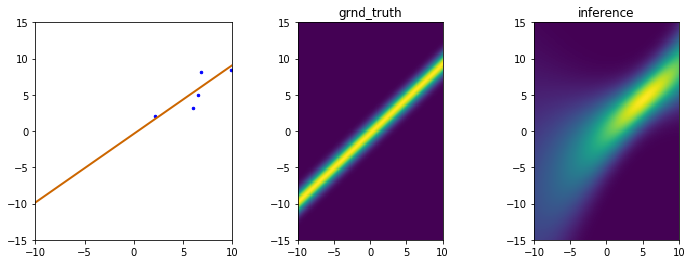

In [57]:
ns = 5
x_range = np.array([-10., 10.])
sg, phi, sgp = generate_nice_params()
plt.rcParams['figure.figsize'] = (12.0, 4.0)

x, w = generate_samples(x_range, sg, phi, ns)
plt.subplot(1,3,1)
plot_samples(x, w, phi)
plt.xlim(x_range)
plt.ylim(1.5*x_range)

nres = 201
plt.subplot(1,3,2)
plot_rg_pdf(phi, sg, nres)
plt.xlim(x_range)
plt.ylim(1.5*x_range)
plt.title("grnd_truth")

nres = 201
res = np.linspace(-15, 15, nres)
xg, yg = np.meshgrid(res, res)
xs = xg.reshape(1, nres ** 2)
ys = yg.reshape(1, nres ** 2)
xs1 = np.vstack((np.ones(xs.shape[1]), xs))
mu, cov, phi, cinv = bayesian_inference(xs1, x, w, sg, sgp)
brg_pdf = spst.norm(mu, cov).pdf(ys.squeeze()).reshape((nres, nres))

plt.subplot(1,3,3)
rg_pdf = np.flipud(brg_pdf)
plt.imshow(rg_pdf, extent=[-15, 15, -15, 15])
plt.xlim(x_range)
plt.ylim(1.5*x_range)
plt.title("inference")

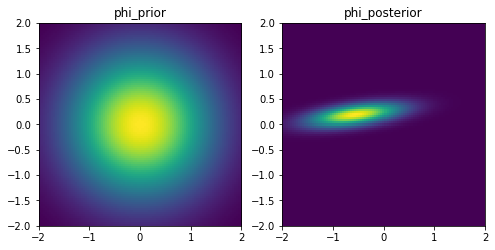

In [55]:
plt.rcParams['figure.figsize'] = (8.0, 4.0)

nres = 101
phi_prior_pdf = generate_phi_pdf(np.zeros(2), sgp*np.eye(2), nres, 3)
plt.subplot(1,2,1)
plt.imshow(phi_prior_pdf , extent=[-2, 2, -2, 2])
plt.title("phi_prior")

phi_posterior_pdf = generate_phi_pdf(phi.squeeze(), cinv, nres, 3)
plt.subplot(1,2,2)
plt.imshow(phi_posterior_pdf, extent=[-2, 2, -2, 2])
plt.title("phi_posterior")

In [30]:
sgp

1.545744322064281

In [42]:
cinv

array([[ 0.48159623, -0.02757917],
       [-0.02757917,  0.01457309]])

## Non-linear regression

## Kernels and the kerneltrick

## Gaussian process regression

## Sparse linear regression

## Dual linear regression

## Relevance vector regression

## Regression to multivariate data